# Install dependencies

In [4]:
import numpy as np
import os
import mmengine
import pickle
import matplotlib.pyplot as plt

# 1. Prepare MCFS-4 dataset

1. Split videos into clips containing single actions,
2. Create dictionary for each clip containing fields: frame_dir, label, img_shape, original_shape, total_frames, keypoint, keypoint_score. Append to list of clips,
3. Create a dictionary with train and test splits, containing file id,
4. Combine both list and dictioanry into a dictionary and dump into .pkl file;

# 1.1 Splitting into clips

In [ ]:
npy_dir = 'MCFS/MCFS-4/features'
txt_dir = 'MCFS/MCFS-4/groundTruth'

for filename in os.listdir(npy_dir):
    if filename.endswith(".npy"):
        # If the file is an .npy file, process it
        base_name = os.path.splitext(filename)[0]  # Extract the base name without extension
        npy_file_path = os.path.join(npy_dir, filename)
        
        # Check if there is a corresponding .txt file
        txt_file_path = os.path.join(txt_dir, f'{base_name}.txt')
        
        if os.path.exists(txt_file_path):
            # Load .npy file
            skeleton_data = np.load(npy_file_path)

            # Load labels from .txt file
            with open(txt_file_path, 'r') as file:
                labels = file.read().splitlines()

            # Check if the number of frames matches the number of labels
            if len(labels) != skeleton_data.shape[0]:
                print("Error: Number of labels does not match the number of frames in the .npy file.")
                exit()

            # Initialize variables for tracking the current label and file
            current_label = None
            file_counter = 0

            start = -1

            # Iterate through frames, create a new file for each label without overwriting
            for frame, label in enumerate(labels):
                if label != current_label:
                    #if file is not the first file
                    if start >= 0:
                        # Create a new file and save the frame
                        np.save(output_file_path, skeleton_data[start:frame])
                        print(f'Creating a new file for label {current_label}: {output_file_path}')
                        file_counter += 1

                    current_label = label
                    start = frame
                    output_file_path = f'MCFS/MCFS-4/preprocess/{current_label}-{file_counter}-{base_name}.npy'
                    
                if frame == len(labels) - 1:
                    # Create a new file and save the frame
                    np.save(output_file_path, skeleton_data[start:frame])
                    print(f'Creating a new file for label {current_label}: {output_file_path}')
                    file_counter = 0

        else:
            print(f"No corresponding .txt file found for {npy_file_path}")

## 1.2 Create dictionary for each clip

In [54]:
#Function for mapping the labels to label_id from mapping.txt
def get_label(filename: str):
    label_name = filename.split("-")[0]
    f = open('MCFS/MCFS-4/mapping.txt', 'r')
    for line in f.readlines():
        t = line.strip()
        t = t.split()
        if label_name == t[1]:
            return int(t[0])

In [55]:
#Directory for preprocessed files
data_dir = 'MCFS/MCFS-4/preprocess'
results = []

prog_bar = mmengine.ProgressBar(5387)
for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        # If the file is an .npy file, process it
        base_name = os.path.splitext(filename)[0]  # Extract the base name without extension
        npy_file_path = os.path.join(data_dir, filename)
        
        skeleton_data = np.load(npy_file_path)
        
        anno = dict()
        anno['frame_dir'] = base_name
        anno['label'] = get_label(base_name)
        anno['img_shape'] = (1080 , 720)
        anno['original_shape'] = (1080 , 720)
        anno['total_frames'] = skeleton_data.shape[0]
        anno['keypoint'] = np.expand_dims(skeleton_data[:,:,0:2],axis = 0)
        anno['keypoint_score'] = np.expand_dims(skeleton_data[:,:,2],axis = 0)
        results.append(anno)
        prog_bar.update()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 5377/5387, 78.7 task/s, elapsed: 68s, ETA:     0s

## 1.3 Create a dictionary with train and test splits

In [56]:
split = dict()

#Extract base names for train split
train_split = []
train_file = open('MCFS/MCFS-4/splits/train.split0.bundle', 'r')
for line in train_file.readlines():
    line = line.strip()
    train_split.append(os.path.splitext(line)[0])

#Extract base names for test split
test_split = []
test_file = open('MCFS/MCFS-4/splits/test.split0.bundle', 'r')
for line in test_file.readlines():
    line = line.strip()
    test_split.append(os.path.splitext(line)[0])

test = []
train = []

#Iterate through every preprocessed file
for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        # If the file is an .npy file, process it
        file_name = os.path.splitext(filename)[0]
        base_name = file_name.split("-")[2]
        
        #If the names match, append to train or test split list
        if any(substring in file_name for substring in train_split):
            train.append(file_name)
        elif any(substring in file_name for substring in test_split):
            test.append(file_name)

#Append to dictionary
split[f'train_x'] = train
split[f'test_x'] = test

## 1.4 Combine splits and annotations and dump into .pkl file

In [58]:
annotations_4 = {'split': split, 'annotations': results}
mmengine.dump(annotations_4, f'data/MCFS-4/MCFS-4_2d.pkl')

#Create .json file for human readability
!python pickle2json.py data/MCFS-4/MCFS-4_2d.pkl

# 2. Prepare MCFS-22 dataset

# 2.1 Splitting into clips

In [69]:
npy_dir = 'MCFS/MCFS-22/features'
txt_dir = 'MCFS/MCFS-22/groundTruth'

for filename in os.listdir(npy_dir):
    if filename.endswith(".npy"):
        # If the file is an .npy file, process it
        base_name = os.path.splitext(filename)[0]  # Extract the base name without extension
        npy_file_path = os.path.join(npy_dir, filename)
        
        # Check if there is a corresponding .txt file
        txt_file_path = os.path.join(txt_dir, f'{base_name}.txt')
        
        if os.path.exists(txt_file_path):
            # Load .npy file
            skeleton_data = np.load(npy_file_path)

            # Load labels from .txt file
            with open(txt_file_path, 'r') as file:
                labels = file.read().splitlines()

            # Check if the number of frames matches the number of labels
            if len(labels) != skeleton_data.shape[0]:
                print("Error: Number of labels does not match the number of frames in the .npy file.")
                exit()

            # Initialize variables for tracking the current label and file
            current_label = None
            file_counter = 0

            start = -1

            # Iterate through frames, create a new file for each label without overwriting
            for frame, label in enumerate(labels):
                if label != current_label:
                    #if file is not the first file
                    if start >= 0:
                        # Create a new file and save the frame
                        np.save(output_file_path, skeleton_data[start:frame])
                        print(f'Creating a new file for label {current_label}: {output_file_path}')
                        file_counter += 1

                    current_label = label
                    start = frame
                    output_file_path = f'MCFS/MCFS-22/preprocess/{current_label}-{file_counter}-{base_name}.npy'
                    
                if frame == len(labels) - 1:
                    # Create a new file and save the frame
                    np.save(output_file_path, skeleton_data[start:frame])
                    print(f'Creating a new file for label {current_label}: {output_file_path}')
                    file_counter = 0

        else:
            print(f"No corresponding .txt file found for {npy_file_path}")

Creating a new file for label NONE: MCFS/MCFS-22/preprocess/NONE-0-n01_p01.npy
Creating a new file for label Flip: MCFS/MCFS-22/preprocess/Flip-1-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-22/preprocess/NONE-2-n01_p01.npy
Creating a new file for label Toeloop_Toeloop: MCFS/MCFS-22/preprocess/Toeloop_Toeloop-3-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-22/preprocess/NONE-4-n01_p01.npy
Creating a new file for label CamelSpin: MCFS/MCFS-22/preprocess/CamelSpin-5-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-22/preprocess/NONE-6-n01_p01.npy
Creating a new file for label StepSequence: MCFS/MCFS-22/preprocess/StepSequence-7-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-22/preprocess/NONE-8-n01_p01.npy
Creating a new file for label Loop: MCFS/MCFS-22/preprocess/Loop-9-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-22/preprocess/NONE-10-n01_p01.npy
Creating a new file for label Loop_Toeloop: MCFS/MCFS-22/preprocess/Loop_Toeloop-1

## 2.2 Create dictionary for each clip

In [32]:
#Function for mapping the labels to label_id from mapping.txt
def get_label(filename: str):
    label_name = filename.split("-")[0]
    f = open('MCFS/MCFS-22/mapping.txt', 'r')
    for line in f.readlines():
        t = line.strip()
        t = t.split()
        if label_name == t[1]:
            return int(t[0])

In [49]:
#Directory for preprocessed files
data_dir = 'MCFS/MCFS-22/preprocess'
results = []

prog_bar = mmengine.ProgressBar(5387)
for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        # If the file is an .npy file, process it
        base_name = os.path.splitext(filename)[0]  # Extract the base name without extension
        npy_file_path = os.path.join(data_dir, filename)
        
        skeleton_data = np.load(npy_file_path)
        
        anno = dict()
        anno['frame_dir'] = base_name
        anno['label'] = get_label(base_name)
        anno['img_shape'] = (1080 , 720)
        anno['original_shape'] = (1080 , 720)
        anno['total_frames'] = skeleton_data.shape[0]
        anno['keypoint'] = np.expand_dims(skeleton_data[:,:,0:2],axis = 0)
        anno['keypoint_score'] = np.expand_dims(skeleton_data[:,:,2],axis = 0)
        results.append(anno)
        prog_bar.update()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5387/5387, 528.7 task/s, elapsed: 10s, ETA:     0s

## 2.3 Create a dictionary with train and test splits

In [72]:
split = dict()

#Extract base names for train split
train_split = []
train_file = open('MCFS/MCFS-22/splits/train.split0.bundle', 'r')
for line in train_file.readlines():
    line = line.strip()
    train_split.append(os.path.splitext(line)[0])

#Extract base names for test split
test_split = []
test_file = open('MCFS/MCFS-22/splits/test.split0.bundle', 'r')
for line in test_file.readlines():
    line = line.strip()
    test_split.append(os.path.splitext(line)[0])

test = []
train = []

#Iterate through every preprocessed file
for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        # If the file is an .npy file, process it
        file_name = os.path.splitext(filename)[0]
        base_name = file_name.split("-")[2]
        
        #If the names match, append to train or test split list
        if any(substring in file_name for substring in train_split):
            train.append(file_name)
        elif any(substring in file_name for substring in test_split):
            test.append(file_name)

#Append to dictionary
split[f'train_x'] = train
split[f'test_x'] = test

## 2.4 Combine splits and annotations and dump into .pkl file

In [73]:
annotations_22 = {'split': split, 'annotations': results}
mmengine.dump(annotations_22, f'data/MCFS-22/MCFS-22_2d.pkl')

#Create .json file for human readability
!python pickle2json.py data/MCFS-22/MCFS-22_2d.pkl

# 3. Prepare MCFS-22 dataset

# 3.1 Splitting into clips

In [4]:
npy_dir = 'MCFS/MCFS-130/features'
txt_dir = 'MCFS/MCFS-130/groundTruth'

for filename in os.listdir(npy_dir):
    if filename.endswith(".npy"):
        # If the file is an .npy file, process it
        base_name = os.path.splitext(filename)[0]  # Extract the base name without extension
        npy_file_path = os.path.join(npy_dir, filename)
        
        # Check if there is a corresponding .txt file
        txt_file_path = os.path.join(txt_dir, f'{base_name}.txt')
        
        if os.path.exists(txt_file_path):
            # Load .npy file
            skeleton_data = np.load(npy_file_path)

            # Load labels from .txt file
            with open(txt_file_path, 'r') as file:
                labels = file.read().splitlines()

            # Check if the number of frames matches the number of labels
            if len(labels) != skeleton_data.shape[0]:
                print("Error: Number of labels does not match the number of frames in the .npy file.")
                exit()

            # Initialize variables for tracking the current label and file
            current_label = None
            file_counter = 0

            start = -1

            # Iterate through frames, create a new file for each label without overwriting
            for frame, label in enumerate(labels):
                if label != current_label:
                    #if file is not the first file
                    if start >= 0:
                        # Create a new file and save the frame
                        np.save(output_file_path, skeleton_data[start:frame])
                        print(f'Creating a new file for label {current_label}: {output_file_path}')
                        file_counter += 1

                    current_label = label
                    start = frame
                    output_file_path = f'MCFS/MCFS-130/preprocess/{current_label}-{file_counter}-{base_name}.npy'
                    
                if frame == len(labels) - 1:
                    # Create a new file and save the frame
                    np.save(output_file_path, skeleton_data[start:frame])
                    print(f'Creating a new file for label {current_label}: {output_file_path}')
                    file_counter = 0

        else:
            print(f"No corresponding .txt file found for {npy_file_path}")

Creating a new file for label NONE: MCFS/MCFS-130/preprocess/NONE-0-n01_p01.npy
Creating a new file for label 3Flip: MCFS/MCFS-130/preprocess/3Flip-1-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-130/preprocess/NONE-2-n01_p01.npy
Creating a new file for label 3Toeloop_3Toeloop: MCFS/MCFS-130/preprocess/3Toeloop_3Toeloop-3-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-130/preprocess/NONE-4-n01_p01.npy
Creating a new file for label FlyCamelSpin4: MCFS/MCFS-130/preprocess/FlyCamelSpin4-5-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-130/preprocess/NONE-6-n01_p01.npy
Creating a new file for label StepSequence4: MCFS/MCFS-130/preprocess/StepSequence4-7-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-130/preprocess/NONE-8-n01_p01.npy
Creating a new file for label 3Loop: MCFS/MCFS-130/preprocess/3Loop-9-n01_p01.npy
Creating a new file for label NONE: MCFS/MCFS-130/preprocess/NONE-10-n01_p01.npy
Creating a new file for label 3Loop_2Toeloop: MCFS/MC

## 3.2 Create dictionary for each clip

In [63]:
#Function for mapping the labels to label_id from mapping.txt
def get_label(filename: str):
    label_name = filename.split("-")[0]
    f = open('MCFS/MCFS-130/mapping.txt', 'r')
    for line in f.readlines():
        t = line.strip()
        t = t.split()
        if label_name == t[1]:
            return int(t[0])

In [64]:
#Directory for preprocessed files
data_dir = 'MCFS/MCFS-130/preprocess'
results = []

prog_bar = mmengine.ProgressBar(5387)
for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        # If the file is an .npy file, process it
        base_name = os.path.splitext(filename)[0]  # Extract the base name without extension
        npy_file_path = os.path.join(data_dir, filename)
        
        skeleton_data = np.load(npy_file_path)
        
        anno = dict()
        anno['frame_dir'] = base_name
        anno['label'] = get_label(base_name)
        anno['img_shape'] = (1080 , 720)
        anno['original_shape'] = (1080 , 720)
        anno['total_frames'] = skeleton_data.shape[0]
        anno['keypoint'] = np.expand_dims(skeleton_data[:,:,0:2],axis = 0)
        anno['keypoint_score'] = np.expand_dims(skeleton_data[:,:,2],axis = 0)
        results.append(anno)
        prog_bar.update()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5389/5387, 255.6 task/s, elapsed: 21s, ETA:     0s

## 3.3 Create a dictionary with train and test splits

In [65]:
split = dict()

#Extract base names for train split
train_split = []
train_file = open('MCFS/MCFS-130/splits/train.split0.bundle', 'r')
for line in train_file.readlines():
    line = line.strip()
    train_split.append(os.path.splitext(line)[0])

#Extract base names for test split
test_split = []
test_file = open('MCFS/MCFS-130/splits/test.split0.bundle', 'r')
for line in test_file.readlines():
    line = line.strip()
    test_split.append(os.path.splitext(line)[0])

test = []
train = []

#Iterate through every preprocessed file
for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        # If the file is an .npy file, process it
        file_name = os.path.splitext(filename)[0]
        base_name = file_name.split("-")[2]
        
        #If the names match, append to train or test split list
        if any(substring in file_name for substring in train_split):
            train.append(file_name)
        elif any(substring in file_name for substring in test_split):
            test.append(file_name)

#Append to dictionary
split[f'train_x'] = train
split[f'test_x'] = test

## 3.4 Combine splits and annotations and dump into .pkl file

In [66]:
annotations_130 = {'split': split, 'annotations': results}
mmengine.dump(annotations_130, f'data/MCFS-130/MCFS-130_2d.pkl')

#Create .json file for human readability
!python pickle2json.py data/MCFS-130/MCFS-130_2d.pkl

# 4. Perform data exploration

## 4.1 Label histogram - MCFS-4

In [72]:
data_dir = 'MCFS/MCFS-4/preprocess'
data = dict()

for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        label_name = filename.split("-")[0]
        f = open('MCFS/MCFS-4/mapping.txt', 'r')
        try:
            data[label_name] += 1
        except KeyError:
            data[label_name] = 1

[411, 806, 1441, 2719]


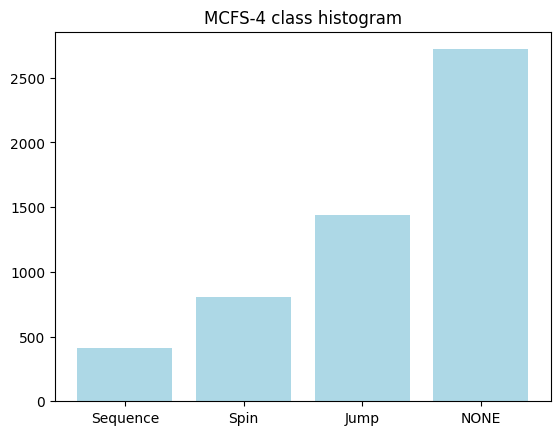

In [74]:
data = dict(sorted(data.items(), key=lambda x:x[1]))
names = list(data.keys())
values = list(data.values())

print(values)

plt.bar(range(len(data)), values, tick_label=names, color = 'lightblue')
plt.title("MCFS-4 class histogram")
plt.savefig("MCFS-4-histogram")
plt.show()

## 4.2 Label histogram - MCFS-22

In [5]:
data_dir = 'MCFS/MCFS-22/preprocess'
data = dict()

for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        label_name = filename.split("-")[0]
        f = open('MCFS/MCFS-22/mapping.txt', 'r')
        try:
            data[label_name] += 1
        except KeyError:
            data[label_name] = 1

[12, 22, 30, 39, 48, 68, 76, 81, 88, 89, 106, 108, 128, 129, 134, 143, 148, 164, 307, 337, 411, 2719]


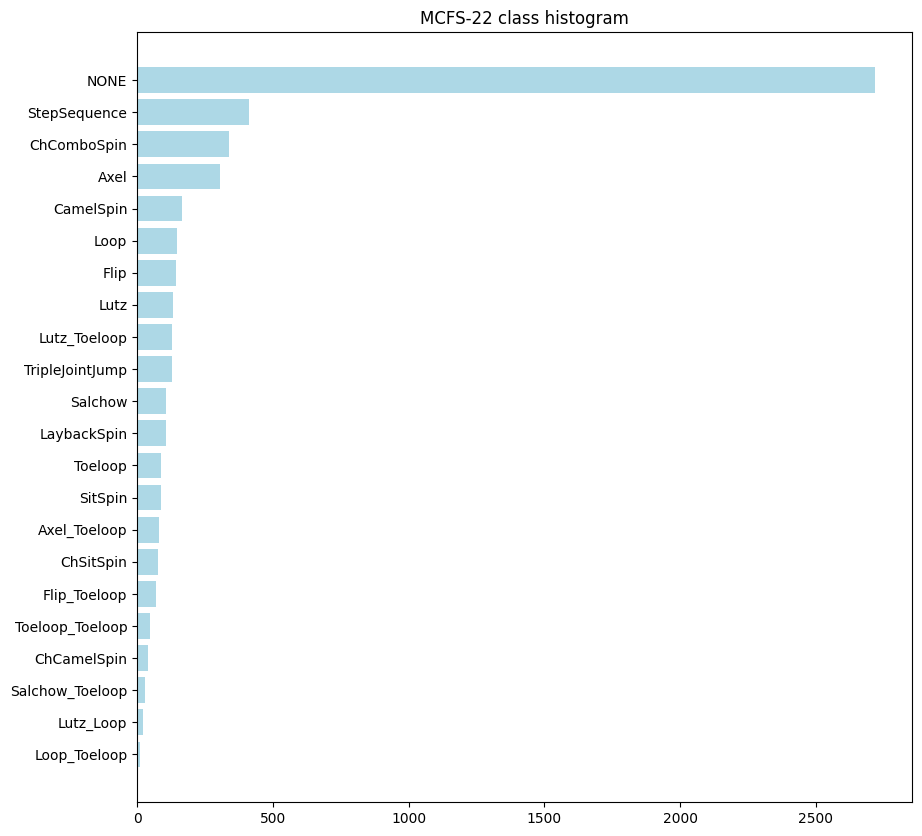

In [13]:
data = dict(sorted(data.items(), key=lambda x:x[1]))
names = list(data.keys())
values = list(data.values())

print(values)

plt.figure(figsize=(10,10))
plt.barh(range(len(data)), values, tick_label=names, color = 'lightblue')
plt.title("MCFS-22 class histogram")
plt.savefig("MCFS-22-histogram")
plt.show()

## 4.3 Label histogram - MCFS-130

In [46]:
data_dir = 'MCFS/MCFS-130/preprocess'
data = dict()

for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        label_name = filename.split("-")[0]
        f = open('MCFS/MCFS-130/mapping.txt', 'r')
        try:
            data[label_name] += 1
        except KeyError:
            data[label_name] = 1

del data["NONE"]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 13, 13, 13, 14, 15, 15, 15, 18, 19, 19, 20, 21, 23, 27, 28, 28, 29, 30, 37, 39, 41, 52, 57, 59, 60, 63, 70, 76, 80, 89, 99, 121, 124, 126, 129, 130, 140, 169, 212]


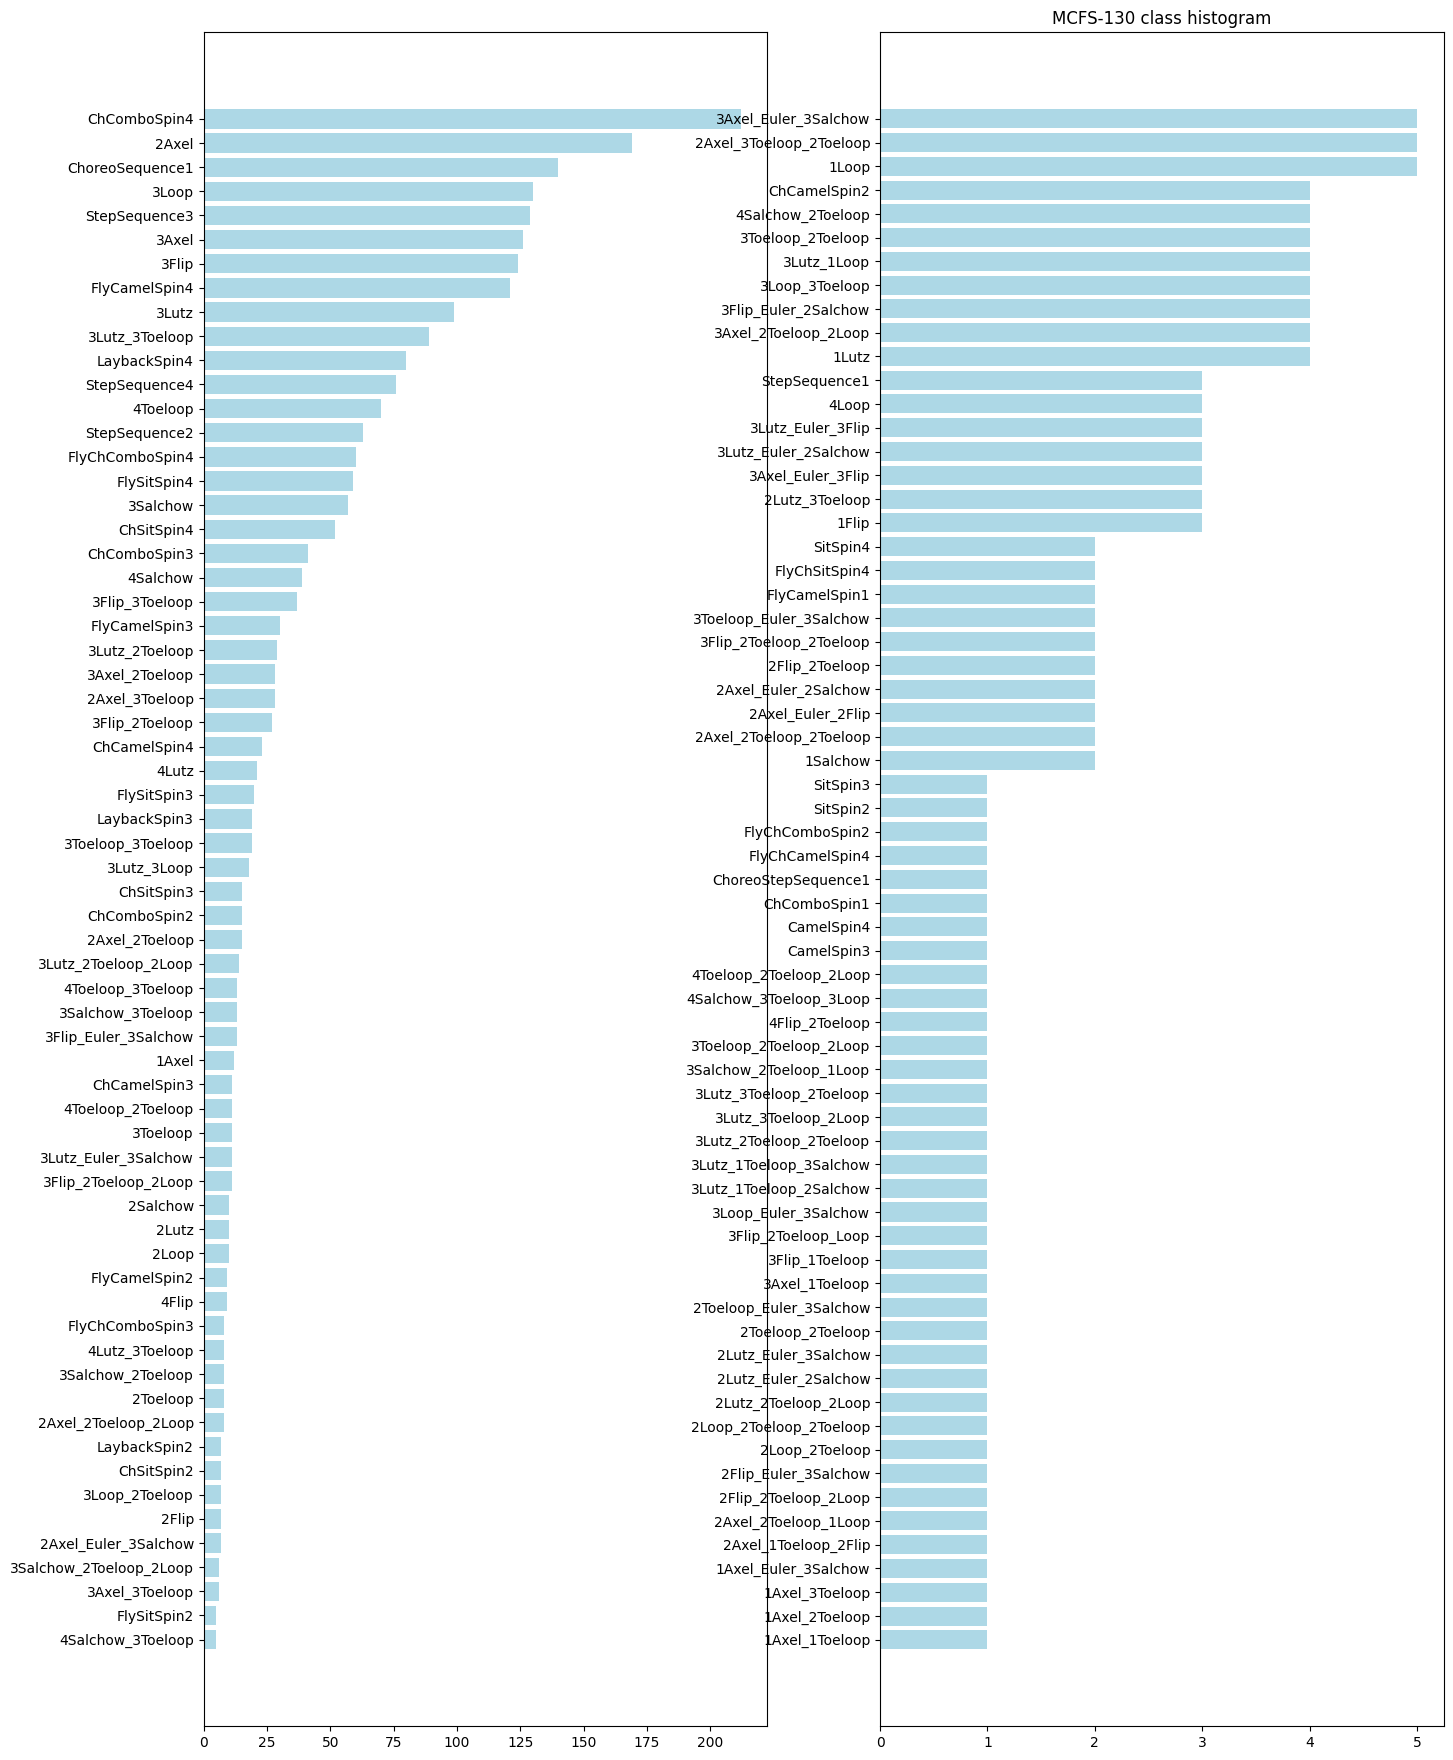

In [54]:
data = dict(sorted(data.items(), key=lambda x:x[1]))

names = list(data.keys())
values = list(data.values())

print(values)

plt.figure(figsize=(16,22))
a1 = plt.subplot2grid((2,2),(0,0), rowspan = 2)
a2 = plt.subplot2grid((2,2),(0,1), rowspan = 2)
a2.barh(names[:65], values[:65], color = 'lightblue')
a1.barh(names[65:], values[65:], color = 'lightblue')
plt.title("MCFS-130 class histogram")
plt.savefig("MCFS-130-histogram")
plt.show()

In [62]:
zero_els = 0
non_zero_els = 0
for res in results:
    zero_els += np.count_nonzero(res['keypoint_score']==0)
    non_zero_els += np.count_nonzero(res['keypoint_score'])     

In [70]:
zero_els / (zero_els + non_zero_els)

0.10561423014063083